# 监督学习 Supervised Learning

引入科学计算和绘图相关包

In [1]:
import math
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# 引入绘图包
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

引入波士顿房价数据

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

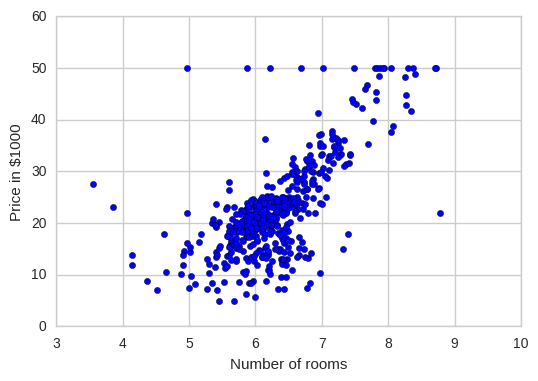

In [3]:
# 我们仅使用ZN（超过25000平方英尺的居住用地区域占比），RM（平均房间数）和Price（按1000美元计的房价中位数）三个指标
X, Y = DataFrame(data=boston.data, columns=boston.feature_names)[["ZN", "RM"]], DataFrame(data=boston.target, columns=["Price"])
# 绘制平均房间数和房价中位数的散点图
plt.scatter(X["RM"], Y)
plt.xlabel("Number of rooms")
plt.ylabel("Price in $1000")

为了方便描述，我们这里引入一些符号。$x^{(i)}$用来表示输入变量，比如这里的平均房间数，它也被称为**特征features**。$y^{(i)}$用来表示输出变量，或我们希望预测的**目标target**变量。一对$(x^{(i)}, y^{(i)})$称为一个**训练样本training example**，而我们将使用的 m 个训练样本$\{(x^{(i)}, y^{(i)});i=1,...,m\}$的集合称为**训练集training set**。注意这里的上标(i)是对训练集的一个索引编号，不是幂运算。我们用$\chi$表示输入空间，$\gamma$表示输出空间。在这个例子中$\chi=\gamma=\mathbb{R}$

正式地定义监督学习：给定一个训练集，我们希望学习到一个函数$h: \chi \rightarrow \gamma$，使得h(x)可以很好地预测y。由于历史原因，函数 h 被称为**假设hypothesis**。

当我们希望预测的目标变量是连续型变量时，比如这里的房价，我们称这是一个**回归**问题。当y仅仅只取少数离散值时，我们称这是一个**分类**问题。

# 线性回归 Linear Regression

包括以下内容：
    1. 最小二乘法 LMS algorithm
    2. 正规方程 The normal equations
    3. 概率诠释 Probabilistic interpretation
    4. 局部加权线性回归 Locally weighted linear regression

In [4]:
# 预览数据
print(X.join(Y).head())

     ZN     RM  Price
0  18.0  6.575   24.0
1   0.0  6.421   21.6
2   0.0  7.185   34.7
3   0.0  6.998   33.4
4   0.0  7.147   36.2


对于这个数据集，x是一个$\mathbb{R}^2$上的二维向量。例如$x_1^i$是训练集中第 i 个居住区域的超过25000平方英尺的居住用地区域占比，$x_2^i$是该区域的平均房间数。

要进行监督学习，我们需要首先决定如何来表示假设/函数 h。较为简单的情况下，我们选取 x 的线性函数来预测 y ：
$$ h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 $$
这里，$\theta_i$称为**参数parameters**（有时也称为**权重weights**），通过这组参数，我们将 $\chi$ 线性映射到 $\gamma$。在不引发误解的情况下，我们将 $h_\theta(x)$简写为 h(x)。习惯上，我们设 $x_0=1$ （称为**截距项intercept term**）,这样
$$ h(x) = \sum_{i=0}^n \theta_ix_i = \theta^Tx $$
对于右式，我们将 $\theta$ 和 x 看做向量，n 是特征数量（不包括 $x_0$ )

这样，给定训练集，我们需要挑选，或者说学习出参数 $theta$ 的值。一个直观的方法是使 h(x) 尽量接近 y，至少对于训练集来说，尽量地接近。为了更正式地定义“接近”，我们定义**成本函数cost function**：
$$ J(\theta) = \frac{1}{2}\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2$$